# Life Satisfaction Prediction
# Does money make people happier?

## Introduction

In this notebook we are trying to analyse , If money makes people happy? To answer this query we are going to develop a simple linear regression model that will predict the  Life Index using GDP of a particular Country.

For training the model we will use Better Life Index data from the OECD’s website as well as stats about GDP per capita from the IMF’s website.

Equation of Simple Linear Regression model :-  life_satisfaction = θ0+ θ1× GDP_per_capita

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib as mpl

## This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

## Load and prepare Life satisfaction data

If you want, you can get fresh data from the OECD's website. Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI

In [3]:
# Load the data
oecd_bli = pd.read_csv(r"C:\Users\rajpu\Desktop\New folder\BLI_12082020105159130.csv", thousands=',')
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


## Load and prepare GDP per capita data

Just like above, you can update the GDP per capita data if you want. Just download data from http://goo.gl/j1MSKe

In [4]:
gdp_per_capita = pd.read_csv(r"C:\Users\rajpu\Desktop\New folder\WEO_Data.xls",thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


## Prepare the data

In [5]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

## Creating a scatterplot to show distribution of data

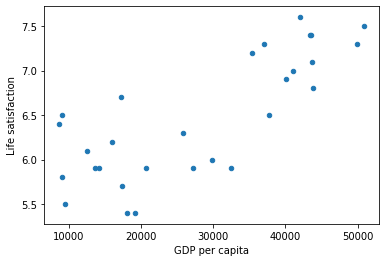

In [6]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

## Training and running a linear model using Scikit-Learn

In [7]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [8]:
# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Make a prediction for Cyprus

For example, say you want to know how happy Cypriots are, and the OECD data does not have the answer.Fortunately, you can use this model to make a good prediction: you look up Cyprus’s GDP per capita, that is : $22,587, and then apply this model and find that life satisfaction is likely to be somewhere around 5.38 + 22,587 × 3.88 × 10-5 = 6.2594414.

In [9]:
X_new = [[22587]] # Cyprus' GDP per capita
model.predict(X_new)

array([[6.25984414]])

## Getting parameters of the linear model

In [10]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(5.382933241430951, 3.8823699577965094e-05)

## Visualizing the model

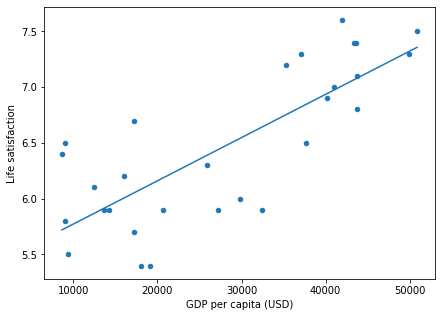

In [11]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(7,5))
plt.xlabel("GDP per capita (USD)")
plt.plot(X,t0 + t1*X)
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Create a pickle file using serialization

In [12]:
import pickle
pickle_out = open("linear.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()